# Least square problems

MAT1120, October 3, 2024

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as anm
from ipywidgets import interact

In [3]:
import numpy as np
import numpy.linalg as la

Least square problems
<pre>
A = [[ 4 0 ]
     [ 0 2 ]
     [ 1 1 ]]
</pre>
and
<pre>
b = [ 2 0 11 ]^t
</pre>

In [4]:
A = np.matrix([[4, 0],
               [0, 2],
               [1, 1]])

In [5]:
b = np.array([2, 0, 11])

orthonormal basis of Col A

In [6]:
u1 = np.array([4, 0, 1]) / np.sqrt(17)

In [7]:
a2 = np.array([0, 2, 1])
v2 = a2 - np.inner(a2, u1) * u1
u2 = v2 / np.sqrt(np.inner(v2, v2))

In [8]:
print(u1)
print(u2)

[0.9701425  0.         0.24253563]
[-0.10585122  0.89973541  0.4234049 ]


orthogonal projection of b to Col A

In [9]:
bhat = np.inner(b, u1) * u1 + np.inner(b, u2) * u2

In [10]:
print(bhat)

[4. 4. 3.]


get least-squares solution

In [11]:
# we can only have a square matrix as the coefficient
la.solve(A[0:2], bhat[0:2])

array([1., 2.])

In [12]:
# check the consistency
# np.array is treated as a column vector
A @ np.array([1, 2])

matrix([[4, 4, 3]])

## approximation by polynomials

In [13]:
def poly_with_error(x):
    err_term = np.random.rand() - 0.5 # rand gives random number between 0 and 1
    return 1 + 2 * x + 3 * x**2 + 4 * x**3 + err_term

In [14]:
x_array = [np.random.rand() for i in range(300)]
y_array = [poly_with_error(the_x) for the_x in x_array]

<IPython.core.display.Javascript object>


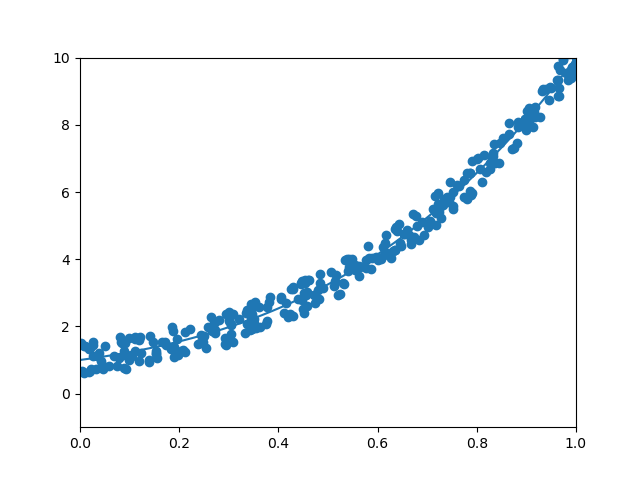

(-1.0, 10.0)

In [15]:
# set up drawing context
fig1, ax1 = plt.subplots()
tvar = np.linspace(0,1,50)

ax1.plot(tvar, 1 + 2*tvar + 3*tvar**2 + 4*tvar**3)
ax1.scatter(x_array, y_array)
ax1.set_xlim((0, 1))
ax1.set_ylim((-1, 10))

In [16]:
A_mat = np.matrix([[1, x, x**2, x**3] for x in x_array])

In [17]:
Q, R = la.qr(A_mat)

In [18]:
b = np.array(y_array)
x_hat = la.inv(R) @ Q.T @ b

In [19]:
print(x_hat)

[[0.97906092 2.46325489 1.99466068 4.54528922]]


<IPython.core.display.Javascript object>


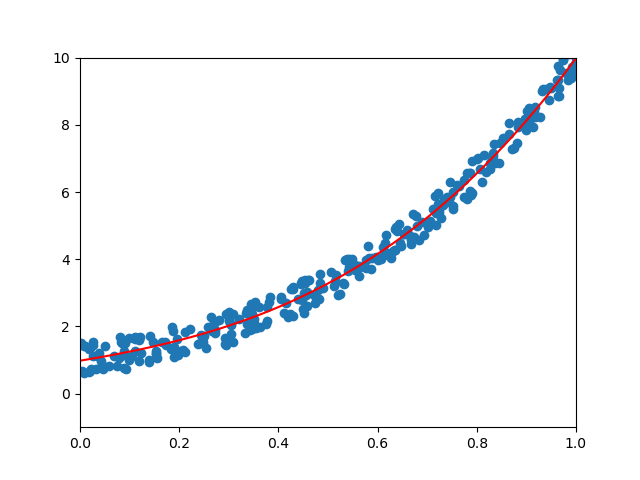

(-1.0, 10.0)

In [20]:
# set up drawing context
fig2, ax2 = plt.subplots()
tvar = np.linspace(0,1,50)

ax2.plot(tvar, x_hat[0,0] + x_hat[0,1]*tvar + x_hat[0,2]*tvar**2 + x_hat[0,3]*tvar**3,color="red")
ax2.scatter(x_array, y_array)
ax2.set_xlim((0, 1))
ax2.set_ylim((-1, 10))

<IPython.core.display.Javascript object>


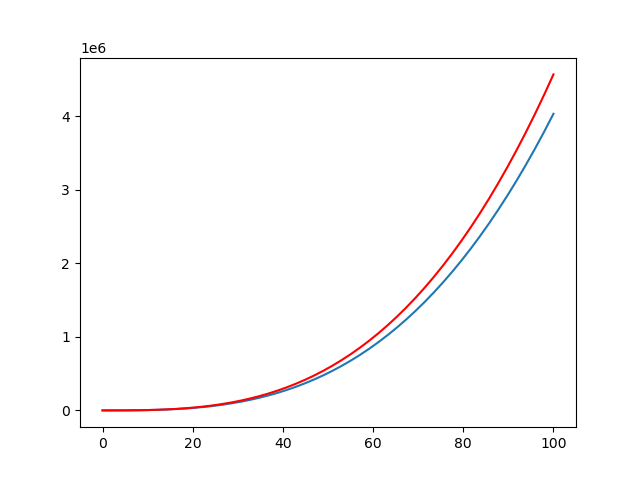

In [21]:
# set up drawing context
fig3, ax3 = plt.subplots()
tpvar = np.linspace(0,100,50)

ax3.plot(tpvar, 1 + 2*tpvar + 3*tpvar**2 + 4*tpvar**3)
ax3.plot(tpvar, x_hat[0,0] + x_hat[0,1]*tpvar + x_hat[0,2]*tpvar**2 + x_hat[0,3]*tpvar**3, color="red")

## approximation by trignometric functions

In [22]:
# upper bound for k in sin(k x), cos(k x)
K = 20

In [23]:
def test_func(x):
    if x < 0.5:
        return 0
    return 1

In [32]:
# our basic functions: trigonometric functions whose period are (length of x-interval) / k
# when the period are too long compared to this length, the approximation can be bad
def sinkx(k, x):
    return np.sin(k * 2 * np.pi * x)
def coskx(k, x):
    return np.cos(k * 2 * np.pi * x)

In [33]:
# interval for the x variable
xis = np.linspace(0, 1, 101)

<IPython.core.display.Javascript object>


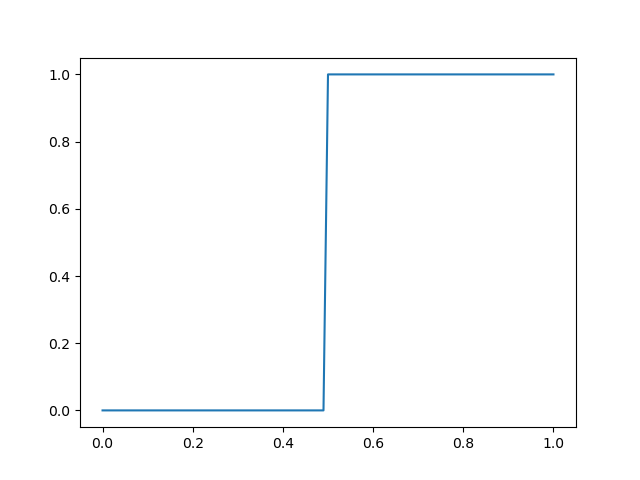

In [34]:
# plot the test function
fig4,ax4= plt.subplots()
ax4.plot(xis, [test_func(x) for x in xis])

In [35]:
# coefficient matrix from the values of our trigonometric functions
A = np.matrix([[coskx(k,x) for k in range(0, K)] + [sinkx(k,x) for k in range(1, K)] for x in xis])
# target vector from the values of test function
b = np.array([test_func(x) for x in xis])

In [36]:
# use QR factorization to compute a least square solution
Q, R = la.qr(A)
v = la.inv(R) @ Q.T @ b

In [37]:
print(v)

[[ 5.05035971e-01 -9.92805755e-03  1.00719424e-02 -9.92805755e-03
   1.00719424e-02 -9.92805755e-03  1.00719424e-02 -9.92805755e-03
   1.00719424e-02 -9.92805755e-03  1.00719424e-02 -9.92805755e-03
   1.00719424e-02 -9.92805755e-03  1.00719424e-02 -9.92805755e-03
   1.00719424e-02 -9.92805755e-03  1.00719424e-02 -9.92805755e-03
  -6.36410319e-01 -5.99939724e-17 -2.11577900e-01 -1.67458737e-18
  -1.26275030e-01  7.12238891e-18 -8.94748566e-02 -2.60566034e-17
  -6.88404515e-02 -7.25735127e-17 -5.55521371e-02  9.02327746e-17
  -4.62172731e-02 -1.12876153e-16 -3.92522101e-02  1.09377309e-16
  -3.38181531e-02 -9.16803148e-17 -2.94291063e-02]]


In [38]:
# construct the approximation with coefficients from the above least square solution
def my_approx(x):
    terms = [v[0,k] * coskx(k,x) for k in range(0, K)] + [v[0,K - 1 + j] * sinkx(j, x) for j in range(1, K)]
    return sum(terms)

<IPython.core.display.Javascript object>


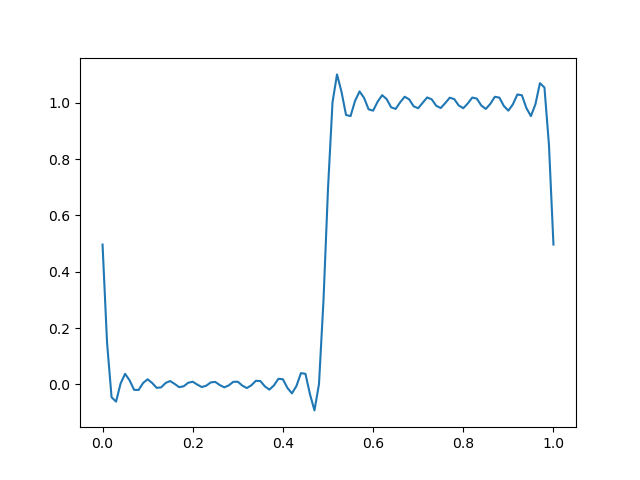

In [39]:
fig5,ax5= plt.subplots()
ax5.plot(xis, [my_approx(x) for x in xis])